In [185]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

In [187]:
def mse(y, output):
    return np.mean((y - output) ** 2)


def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

In [188]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights and biases randomly
        # W1: weights for the input layer to the hidden layer
        # b1: biases for the hidden layer
        # W2: weights for the hidden layer to the output layer
        # b2: biases for the output layer
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, X):
        # Forward propagation
        # Compute the weighted sum of inputs and biases for the hidden layer
        self.z1 = X @ self.W1 + self.b1
        # Apply the sigmoid activation function to the weighted sum of the hidden layer
        self.a1 = sigmoid(self.z1)
        # Compute the weighted sum of hidden layer outputs and biases for the output layer
        self.z2 = self.a1 @ self.W2 + self.b2
        # Apply the sigmoid activation function to the weighted sum of the output layer
        output = sigmoid(self.z2)
        return output

    def backward(self, X, y, output):
        # Backpropagation
        # Compute the error between the predicted output and the true labels
        output_error = y - output
        # Compute the delta for the output layer using the derivative of the sigmoid function
        output_delta = output_error * sigmoid_derivative(output)

        # Compute the error for the hidden layer by propagating the output delta backwards
        hidden_error = output_delta @ self.W2.T
        # Compute the delta for the hidden layer using the derivative of the sigmoid function
        hidden_delta = hidden_error * sigmoid_derivative(self.a1)

        # Compute gradients for weights and biases
        # Compute the gradient for W2 using the outer product of the hidden layer outputs and output delta
        self.W2_gradient = self.a1.T @ output_delta
        # Compute the gradient for b2 by summing the output delta along the rows
        self.b2_gradient = np.sum(output_delta, axis=0)
        # Compute the gradient for W1 using the outer product of the input X and hidden delta
        self.W1_gradient = X.T @ hidden_delta
        # Compute the gradient for b1 by summing the hidden delta along the rows
        self.b1_gradient = np.sum(hidden_delta, axis=0)

    def update_weights(self, learning_rate):
        # Stochastic Gradient Descent (SGD) update
        # Update the weights and biases using the computed gradients and the learning rate
        self.W2 += learning_rate * self.W2_gradient
        self.b2 += learning_rate * self.b2_gradient
        self.W1 += learning_rate * self.W1_gradient
        self.b1 += learning_rate * self.b1_gradient

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            # Compute the mean squared error loss
            loss = mse(y, output)
            losses.append(loss)
            # Backpropagation
            self.backward(X, y, output)
            # Update weights and biases using SGD
            self.update_weights(learning_rate)
            # Print the loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch: {epoch + 1}, Loss: {loss}")
        return losses

    def predict(self, X):
        # Make predictions using the trained network
        return self.forward(X)

In [189]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the neural network
input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)
losses = nn.train(X, y, epochs, learning_rate)

Epoch: 1000, Loss: 0.24997985073278742
Epoch: 2000, Loss: 0.2458007152978481
Epoch: 3000, Loss: 0.21369391224842102
Epoch: 4000, Loss: 0.1378748901488997
Epoch: 5000, Loss: 0.0401485343217461
Epoch: 6000, Loss: 0.01513373639489348
Epoch: 7000, Loss: 0.0084380656641651
Epoch: 8000, Loss: 0.0056619714484528495
Epoch: 9000, Loss: 0.004198210840730959
Epoch: 10000, Loss: 0.0033094094764096913


In [190]:
predictions = nn.predict(X)
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Prediction: {predictions[i]}")

Predictions:
Input: [0 0], Prediction: [0.04908903]
Input: [0 1], Prediction: [0.94526157]
Input: [1 0], Prediction: [0.94537215]
Input: [1 1], Prediction: [0.06960289]


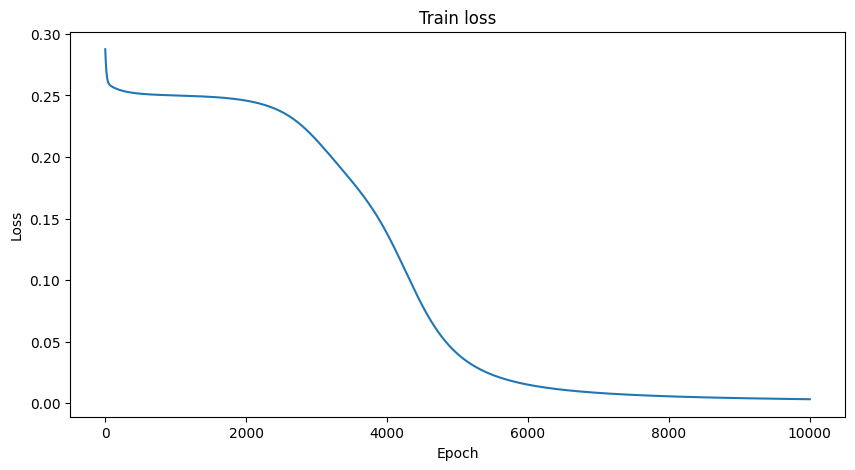

In [191]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(epochs), y=losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train loss")
plt.show()

## Minibatch SGD


In [192]:
class DenseLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.random.randn(output_size)

    def forward(self, inputs):
        self.inputs = inputs
        self.weighted_sum = inputs @ self.weights + self.biases
        self.output = sigmoid(self.weighted_sum)
        return self.output

    def backward(self, delta):
        self.delta = delta * sigmoid_derivative(self.output)
        self.weights_gradient = self.inputs.T @ self.delta
        self.biases_gradient = np.sum(self.delta, axis=0)
        return self.delta @ self.weights.T

    def update_weights(self, learning_rate):
        self.weights += learning_rate * self.weights_gradient
        self.biases += learning_rate * self.biases_gradient

In [193]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = DenseLayer(input_size, hidden_size)
        self.output_layer = DenseLayer(hidden_size, output_size)

    def forward(self, X):
        hidden_output = self.hidden_layer.forward(X)
        output = self.output_layer.forward(hidden_output)
        return output

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = self.output_layer.backward(output_error)
        self.hidden_layer.backward(output_delta)

    def update_weights(self, learning_rate):
        self.hidden_layer.update_weights(learning_rate)
        self.output_layer.update_weights(learning_rate)

    def train(self, X, y, epochs, learning_rate, batch_size):
        n_samples = X.shape[0]
        losses = []
        for epoch in range(epochs):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for start_idx in range(0, n_samples, batch_size):
                end_idx = min(start_idx + batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]

                output = self.forward(X_batch)
                loss = mse(y_batch, output)
                losses.append(loss)

                self.backward(X_batch, y_batch, output)
                self.update_weights(learning_rate)

            if (epoch + 1) % 1000 == 0:
                print(
                    f"Epoch: {epoch + 1}, Loss: {np.mean(losses[-(n_samples // batch_size):])}"
                )

        return losses

In [195]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

input_size = 2
hidden_size = 2
output_size = 1
model = NeuralNetwork(input_size, hidden_size, output_size)

epochs = 10000
batch_size = 2
learning_rate = 0.1
losses = model.train(X, y, epochs, learning_rate, batch_size)


predictions = model.forward(X)
print("\nPredictions:")
for i, (X, y, pred) in enumerate(zip(X, y, predictions)):
    print(f"Input: {X} - Real: {y[0]} - Prediction: {pred[0]:.4f}")

Epoch: 1000, Loss: 0.2466635625105993
Epoch: 2000, Loss: 0.2112633113770705
Epoch: 3000, Loss: 0.18258686309330274
Epoch: 4000, Loss: 0.15933071149705474
Epoch: 5000, Loss: 0.07296252580782123
Epoch: 6000, Loss: 0.02128890380452398
Epoch: 7000, Loss: 0.010281949455954054
Epoch: 8000, Loss: 0.0064732927226284495
Epoch: 9000, Loss: 0.0046356054048823135
Epoch: 10000, Loss: 0.003576696343405833

Predictions:
Input: [0 0] - Real: 0 - Prediction: 0.0496
Input: [0 1] - Real: 1 - Prediction: 0.9432
Input: [1 0] - Real: 1 - Prediction: 0.9433
Input: [1 1] - Real: 0 - Prediction: 0.0735
